In [7]:
import csv
import matplotlib.pyplot as plt
import json
import numpy as np
import threading
import pandas as pd
from os import listdir
from os.path import isfile, join
from glob import glob
import os
import shutil
from matplotlib.pyplot import figure
import seaborn as sns

this code was used to find the total number of items that were sold of each classification of item
the item classifications are as follows
    Low 
    medium
    high
low is less than 1 euro, medium is less than 5 euro excluding items less than 1 euro and high are items costing more than 5 euro.
this was done individually due to the length of running as there are a huge amount of files and i didnt want to over run my computer over night.

In [3]:
folder="marketplaceFiles/marketcsv/"
subfolders = [ f.path for f in os.scandir(folder) if f.is_dir() ]


NameError: name 'os' is not defined

Item Classification for each game

In [49]:
'''
low list to hold all items in the low catagory
medium list to hold all items in the medium catagory
high list to hold all items in the high catagory
'''
low=[]
medium=[]
high=[]
t1=1
t2 = 5
onlyfiles = [f for f in listdir("marketplaceFiles/marketcsv/578080") if isfile(join("marketplaceFiles/marketcsv/578080", f))]
for y in range(0,len(onlyfiles),1):
    df1=pd.read_csv('marketplaceFiles/marketcsv/578080/'+onlyfiles[y])
    df1 = df1.replace(0, np.NaN)
    meanPrice=df1["price"].mean(skipna=True)
    if meanPrice <=t1:
        low.append(onlyfiles[y])
        print(y)
    elif meanPrice >= t1 and meanPrice< t2:
        medium.append(onlyfiles[y])
        print(y)
    else :
        high.append(onlyfiles[y])
        print(y)
    print(y)
        


0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
25
26
26
27
27
28
28
29
29
30
30
31
31
32
32
33
33
34
34
35
35
36
36
37
37
38
38
39
39
40
40
41
41
42
42
43
43
44
44
45
45
46
46
47
47
48
48
49
49
50
50
51
51
52
52
53
53
54
54
55
55
56
56
57
57
58
58
59
59
60
60
61
61
62
62
63
63
64
64
65
65
66
66
67
67
68
68
69
69
70
70
71
71
72
72
73
73
74
74
75
75
76
76
77
77
78
78
79
79
80
80
81
81
82
82
83
83
84
84
85
85
86
86
87
87
88
88
89
89
90
90
91
91
92
92
93
93
94
94
95
95
96
96
97
97
98
98
99
99
100
100
101
101
102
102
103
103
104
104
105
105
106
106
107
107
108
108
109
109
110
110
111
111
112
112
113
113
114
114
115
115
116
116
117
117
118
118
119
119
120
120
121
121
122
122
123
123
124
124
125
125
126
126
127
127
128
128
129
129
130
130
131
131
132
132
133
133
134
134
135
135
136
136
137
137
138
138
139
139
140
140
141
141
142
142
143
143
144
144
145
145
146
146
147
147
148
148
149
149
150
150
151
151
152


This just lets me know what the perportions for each were to check there were no issues

In [50]:
print(len(low))
print(len(medium))
print(len(high))

173
76
51


Creating data frames with the sales data. this was multithreaded to save time. Run for each game manually due to avoid computer running processor demanding code for long periods of time

In [51]:
def a1():
    df1 = pd.read_csv("marketplaceFiles/marketcsv/578080/"+str(low[0]))
    df1["date"]=pd.to_datetime(df1["date"])
    df1=df1.groupby(df1["date"]).agg({str(low[0]):sum})
    for fileno in range((1),len(low)):
        df2 = pd.read_csv("marketplaceFiles/marketcsv/578080/"+low[fileno])
        df2["date"]=pd.to_datetime(df2["date"])
        df2=df2.groupby(df2["date"]).agg({str(low[fileno]):sum})
        df1=pd.concat([df1,df2], axis=1)
        print(fileno)
    df1=df1.round(2)
    df1=df1.drop_duplicates()
    df1["lowDailyTotal"]=df1.sum(axis=1)
    df1.to_csv("SP/low_578080.csv",index=True)

In [52]:
def a2():
    df5 = pd.read_csv("marketplaceFiles/marketcsv/578080/"+str(medium[0]))
    df5["date"]=pd.to_datetime(df5["date"])
    df5=df5.groupby(df5["date"]).agg({str(medium[0]):sum})
    for fileno in range((1),len(medium)):
        df6 = pd.read_csv("marketplaceFiles/marketcsv/578080/"+medium[fileno])
        df6["date"]=pd.to_datetime(df6["date"])
        df6=df6.groupby(df6["date"]).agg({str(medium[fileno]):sum})
        df6=pd.concat([df5,df6], axis=1)
        print(fileno)
    df5=df5.round(2)
    df5=df5.drop_duplicates()
    df5["mediumDailyTotal"]=df5.sum(axis=1)
    df5.to_csv("SP/Med_578080.csv",index=True)


In [53]:
def a3():
    df3 = pd.read_csv("marketplaceFiles/marketcsv/578080/"+str(high[0]))
    df3["date"]=pd.to_datetime(df3["date"])
    df3=df3.groupby(df3["date"]).agg({str(high[0]):sum})
    for fileno in range((1),len(high)):
        df4 = pd.read_csv("marketplaceFiles/marketcsv/578080/"+high[fileno])
        df4["date"]=pd.to_datetime(df4["date"])
        df4=df4.groupby(df4["date"]).agg({str(high[fileno]):sum})
        df3=pd.concat([df3,df4], axis=1)
        print(fileno)
    df3=df3.round(2)
    df3=df3.drop_duplicates()
    df3["highDailyTotal"]=df3.sum(axis=1)
    df3.to_csv("SP/high_578080.csv",index=True)


In [54]:
t1 = threading.Thread(target=a1, args=())
t2 = threading.Thread(target=a2, args=())
t3 = threading.Thread(target=a3, args=())

t1.start()
t2.start()
t3.start()

t1.join()
t2.join()
t3.join()
print("done")

1
1
2
1
3
2
4
2
5
3
3
6
7
4
4
8
5
5
9
6
6
10
7
11
8
7
12
9
13
8
10
14
9
11
15
12
10
16
13
11
14
17
12
15
18
13
19
16
20
14
17
21
18
15
22
19
16
23
24
20
17
25
21
18
26
22
27
19
23
28
20
24
29
21
25
30
22
26
31
23
27
32
24
33
28
25
34
29
26
35
30
31
36
27
32
37
28
38
29
39
30
33
40
31
41
34
32
42
35
33
36
43
34
37
44
38
35
39
45
36
40
46
47
48
41
37
49
42
38
50
43
44
39
45
40
51
46
41
47
52
42
53
48
54
49
43
55
50
56
44
57
45
58
46
59
47
60
61
48
62
49
63
5064

65
51
66
6752

68
53
69
70
54
71
55
72
56
73
57
74
75
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
done


This is getting the results for a single game to get an idea of what was needed and to play with graphs. quicker to run than the for multiple games

In [27]:
dfa = pd.read_csv("SP/low_730.csv")
dfb = pd.read_csv("SP/med_730.csv")
dfc = pd.read_csv("SP/high_730.csv")

In [28]:
dfa["date"] =pd.to_datetime(dfa["date"])
dfa.set_index("date",drop=True)
dfb["date"] =pd.to_datetime(dfb["date"])
dfb.set_index("date",drop=True)
dfc["date"] =pd.to_datetime(dfc["date"])
dfc.set_index("date",drop=True)

,10.txt,100.txt,1000.txt,10005.txt,1004.txt,10062.txt,10064.txt,10080.txt,101.txt,10100.txt,...,98.txt,981.txt,9830.txt,9863.txt,9918.txt,996.txt,9964.txt,9968.txt,998.txt,highDailyTotal
date,,,,,,,,,,,,,,,,,,,,,
2013-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.02
2013-04-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,294.10
2013-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226.66
2013-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.61
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,36150.47,2024.12,529.42,NaN,223.01,48.28,201.29,320.20,2252.67,13.47,...,2260.81,647.00,72.51,44.04,399.86,523.78,40.42,137.61,400.81,1741807.97
2021-04-02,20595.50,2534.32,599.60,468.06,284.68,25.82,266.44,105.69,2330.45,NaN,...,2125.53,617.90,119.78,82.98,239.92,484.26,93.34,28.19,494.45,1811386.34
2021-04-03,18209.42,2590.94,508.51,104.38,275.52,NaN,316.58,369.68,2122.08,112.45,...,2310.20,550.67,47.83,64.87,107.89,526.77,NaN,89.31,519.26,1805837.69


In [29]:
dfa=dfa.fillna(0)
dfb=dfb.fillna(0)
dfc=dfc.fillna(0)

In [30]:
dfa.head(1)

,date,0.txt,1.txt,10000.txt,10001.txt,10002.txt,10004.txt,10006.txt,10007.txt,10008.txt,...,9986.txt,9988.txt,9989.txt,9990.txt,9991.txt,9994.txt,9996.txt,9997.txt,9999.txt,lowDailyTotal
0,2013-08-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.42


In [31]:
dfb.head(1)

,date,10003.txt,mediumDailyTotal
0,2013-09-20,113.92,113.92


In [32]:
dfc.head(1)

,date,10.txt,100.txt,1000.txt,10005.txt,1004.txt,10062.txt,10064.txt,10080.txt,101.txt,...,98.txt,981.txt,9830.txt,9863.txt,9918.txt,996.txt,9964.txt,9968.txt,998.txt,highDailyTotal
0,2013-04-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.02


In [33]:
dfa=dfa.groupby(dfa["date"]).agg({"lowDailyTotal":sum})
dfb=dfb.groupby(dfb["date"]).agg({"mediumDailyTotal":sum})
dfc=dfc.groupby(dfc["date"]).agg({"highDailyTotal":sum})

In [34]:
dfa.head()

,lowDailyTotal
date,
2013-08-13,2.42
2013-08-14,282.53
2013-08-15,5584.07
2013-08-16,7284.32
2013-08-17,6952.90


In [35]:
dfa=pd.concat([dfa,dfb,dfc], axis=1) 

In [36]:
dfa=dfa.fillna(0)

In [37]:
dfa["mediumDailyTotal"]=dfa["lowDailyTotal"]+dfa["mediumDailyTotal"]

In [38]:
dfa

,lowDailyTotal,mediumDailyTotal,highDailyTotal
date,,,
2013-04-26,0.00,0.00,123.02
2013-04-27,0.00,0.00,294.10
2013-04-28,0.00,0.00,226.66
2013-04-29,0.00,0.00,283.61
2013-04-30,0.00,0.00,180.46
...,...,...,...
2021-04-01,633623.10,633626.99,1741807.97
2021-04-02,688537.27,688537.27,1811386.34
2021-04-03,711417.99,711425.53,1805837.69


In [39]:
dfa["highDailyTotal"]=dfa["highDailyTotal"]+dfa["mediumDailyTotal"]

In [40]:
dfa

,lowDailyTotal,mediumDailyTotal,highDailyTotal
date,,,
2013-04-26,0.00,0.00,123.02
2013-04-27,0.00,0.00,294.10
2013-04-28,0.00,0.00,226.66
2013-04-29,0.00,0.00,283.61
2013-04-30,0.00,0.00,180.46
...,...,...,...
2021-04-01,633623.10,633626.99,2375434.96
2021-04-02,688537.27,688537.27,2499923.61
2021-04-03,711417.99,711425.53,2517263.22


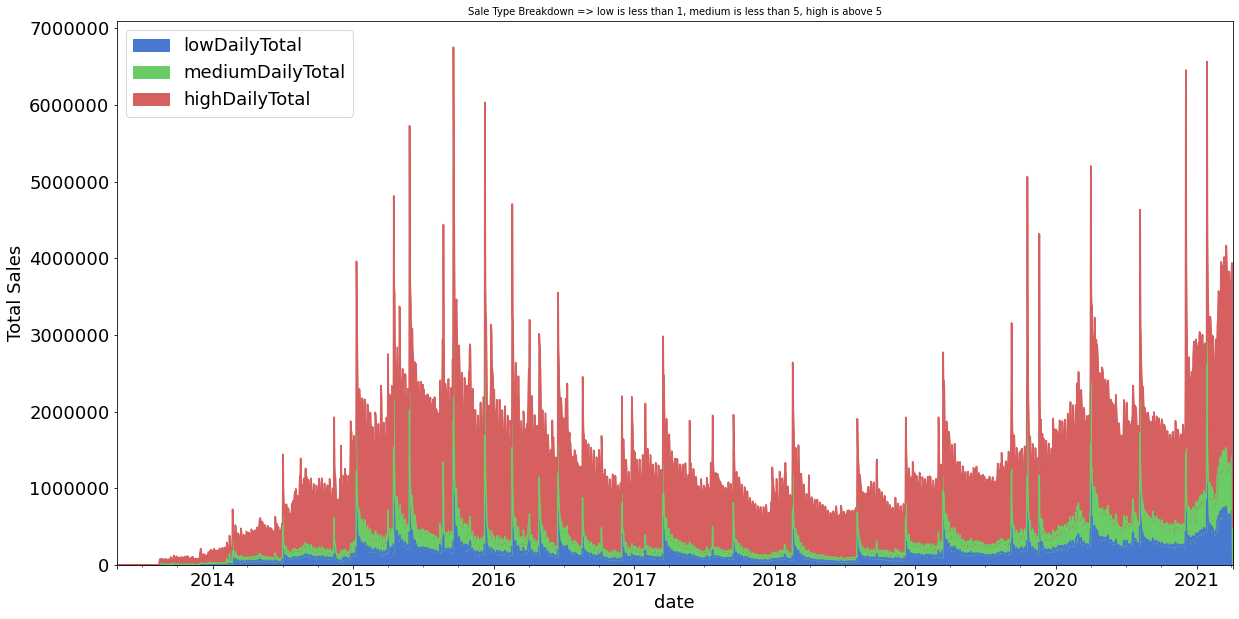

In [41]:
ax = dfa.plot.area(figsize=(20, 10))
plt.ticklabel_format(style='plain', axis='y')
ax.set_ylabel("Total Sales")
plt.style.use("seaborn-muted")
ax.set_title('Sale Type Breakdown => low is less than 1, medium is less than 5, high is above 5', fontsize=10)
plt.savefig("Graphs2/730_graph.png")

In [42]:
data_perc = dfa.divide(dfa.sum(axis=1),axis=0)

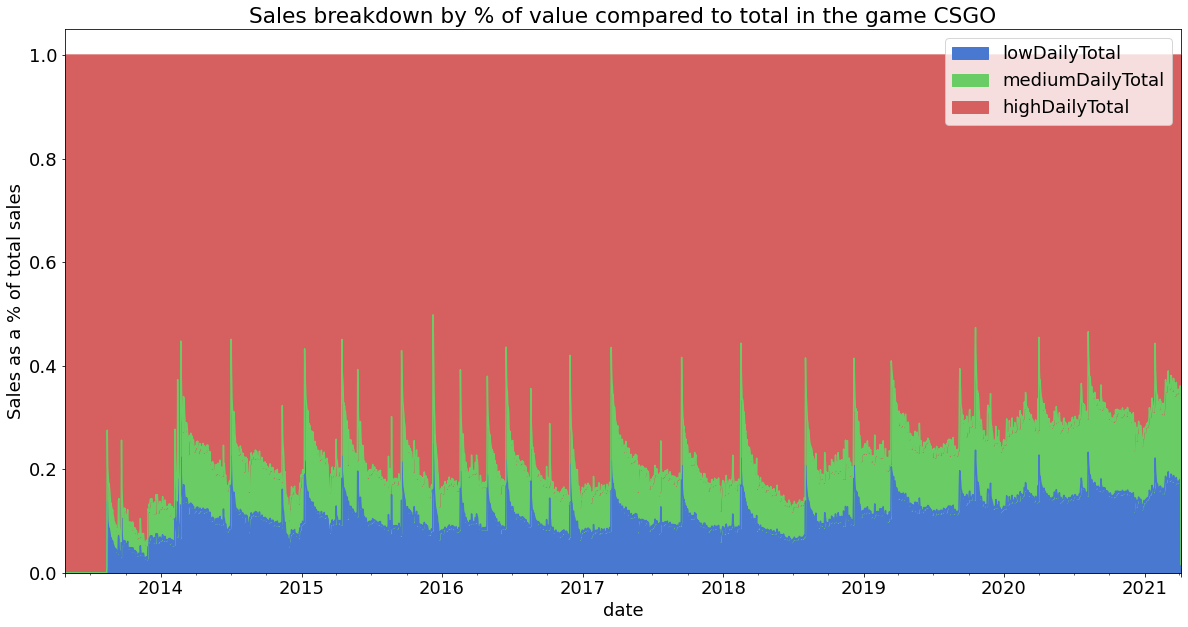

In [45]:
plt.rcParams.update({'font.size': 18})
ax2=data_perc.plot(kind="area",figsize=(20, 10))
ax2.set_ylabel("Sales as a % of total sales")
plt.style.use("seaborn-muted")
plt.legend(loc ="upper right",frameon=True)
ax2.set_title('Sales breakdown by % of value compared to total in the game CSGO')
plt.savefig("Graphs2/730_per_graph.png")

Porpotion of all with a large number of sales. this is using the top 5 games.


In [8]:
dfa = pd.read_csv("SP/low_730.csv")
dfb = pd.read_csv("SP/low_252490.csv")
dfc = pd.read_csv("SP/low_570.csv")
dfd = pd.read_csv("SP/low_440.csv")
dfe = pd.read_csv("SP/low_578080.csv")
dff = pd.read_csv("SP/low_218620.csv")

dfa1 = pd.read_csv("SP/Med_730.csv")
dfb1 = pd.read_csv("SP/Med_252490.csv")
dfc1 = pd.read_csv("SP/Med_570.csv")
dfd1 = pd.read_csv("SP/Med_440.csv")
dfe1 = pd.read_csv("SP/Med_578080.csv")
dff1 = pd.read_csv("SP/Med_218620.csv")

dfa2 = pd.read_csv("SP/high_730.csv")
dfb2 = pd.read_csv("SP/high_252490.csv")
dfc2 = pd.read_csv("SP/high_570.csv")
dfd2 = pd.read_csv("SP/high_440.csv")
dfe2 = pd.read_csv("SP/high_578080.csv")
dff2 = pd.read_csv("SP/high_218620.csv")

In [9]:
dfa["date"] =pd.to_datetime(dfa["date"])
dfa.set_index("date",drop=True)
dfb["date"] =pd.to_datetime(dfb["date"])
dfb.set_index("date",drop=True)
dfc["date"] =pd.to_datetime(dfc["date"])
dfc.set_index("date",drop=True)
dfd["date"] =pd.to_datetime(dfd["date"])
dfd.set_index("date",drop=True)
dfe["date"] =pd.to_datetime(dfe["date"])
dfe.set_index("date",drop=True)
dff["date"] =pd.to_datetime(dff["date"])
dff.set_index("date",drop=True)

dfa1["date"] =pd.to_datetime(dfa1["date"])
dfa1.set_index("date",drop=True)
dfb1["date"] =pd.to_datetime(dfb1["date"])
dfb1.set_index("date",drop=True)
dfc1["date"] =pd.to_datetime(dfc1["date"])
dfc1.set_index("date",drop=True)
dfd1["date"] =pd.to_datetime(dfd1["date"])
dfd1.set_index("date",drop=True)
dfe1["date"] =pd.to_datetime(dfe1["date"])
dfe1.set_index("date",drop=True)
dff1["date"] =pd.to_datetime(dff1["date"])
dff1.set_index("date",drop=True)

dfa2["date"] =pd.to_datetime(dfa2["date"])
dfa2.set_index("date",drop=True)
dfb2["date"] =pd.to_datetime(dfb2["date"])
dfb2.set_index("date",drop=True)
dfc2["date"] =pd.to_datetime(dfc2["date"])
dfc2.set_index("date",drop=True)
dfd2["date"] =pd.to_datetime(dfd2["date"])
dfd2.set_index("date",drop=True)
dfe2["date"] =pd.to_datetime(dfe2["date"])
dfe2.set_index("date",drop=True)
dff2["date"] =pd.to_datetime(dff2["date"])
dff2.set_index("date",drop=True)

,131.txt,206.txt,221.txt,252.txt,271.txt,277.txt,288.txt,290.txt,291.txt,3070.txt,...,617.txt,625.txt,639.txt,641.txt,669.txt,701.txt,724.txt,776.txt,784.txt,highDailyTotal
date,,,,,,,,,,,,,,,,,,,,,
2015-10-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.56
2015-10-16,NaN,NaN,25.93,NaN,NaN,NaN,NaN,NaN,NaN,154.60,...,NaN,NaN,NaN,NaN,102.61,NaN,NaN,NaN,NaN,618.76
2015-10-17,NaN,NaN,82.06,NaN,NaN,NaN,NaN,NaN,NaN,32.95,...,NaN,NaN,NaN,NaN,14.27,NaN,NaN,NaN,NaN,329.67
2015-10-18,NaN,NaN,93.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,485.20
2015-10-19,NaN,NaN,134.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,84.83,NaN,NaN,NaN,NaN,354.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-04,28.4,36.77,0.75,0.20,1.08,3.66,61.33,13.09,3.77,NaN,...,NaN,NaN,NaN,NaN,6.35,6.24,NaN,NaN,NaN,800.52
2021-04-05,NaN,NaN,1.44,0.30,0.65,5.54,NaN,5.28,4.42,0.40,...,NaN,NaN,NaN,NaN,1.82,NaN,NaN,NaN,NaN,777.89
2021-04-06,NaN,NaN,1.93,NaN,NaN,NaN,NaN,21.47,3.64,NaN,...,13.53,NaN,1.39,NaN,3.87,NaN,NaN,NaN,NaN,1154.71


In [10]:
dfa=dfa.fillna(0)
dfb=dfb.fillna(0)
dfc=dfc.fillna(0)
dfd=dfd.fillna(0)
dfe=dfe.fillna(0)
dff=dff.fillna(0)

dfa1=dfa1.fillna(0)
dfb1=dfb1.fillna(0)
dfc1=dfc1.fillna(0)
dfd1=dfd1.fillna(0)
dfe1=dfe1.fillna(0)
dff1=dff1.fillna(0)

dfa2=dfa2.fillna(0)
dfb2=dfb2.fillna(0)
dfc2=dfc2.fillna(0)
dfd2=dfd2.fillna(0)
dfe2=dfe2.fillna(0)
dff2=dff2.fillna(0)

In [11]:
dfa=dfa.groupby(dfa["date"]).agg({"lowDailyTotal":sum})
dfb=dfb.groupby(dfb["date"]).agg({"lowDailyTotal":sum})
dfc=dfc.groupby(dfc["date"]).agg({"lowDailyTotal":sum})
dfd=dfd.groupby(dfd["date"]).agg({"lowDailyTotal":sum})
dfe=dfe.groupby(dfe["date"]).agg({"lowDailyTotal":sum})
dff=dff.groupby(dff["date"]).agg({"lowDailyTotal":sum})

dfa1=dfa1.groupby(dfa1["date"]).agg({"mediumDailyTotal":sum})
dfb1=dfb1.groupby(dfb1["date"]).agg({"mediumDailyTotal":sum})
dfc1=dfc1.groupby(dfc1["date"]).agg({"mediumDailyTotal":sum})
dfd1=dfd1.groupby(dfd1["date"]).agg({"mediumDailyTotal":sum})
dfe1=dfe1.groupby(dfe1["date"]).agg({"mediumDailyTotal":sum})
dff1=dff1.groupby(dff1["date"]).agg({"mediumDailyTotal":sum})

dfa2=dfa2.groupby(dfa2["date"]).agg({"highDailyTotal":sum})
dfb2=dfb2.groupby(dfb2["date"]).agg({"highDailyTotal":sum})
dfc2=dfc2.groupby(dfc2["date"]).agg({"highDailyTotal":sum})
dfd2=dfd2.groupby(dfd2["date"]).agg({"highDailyTotal":sum})
dfe2=dfe2.groupby(dfe2["date"]).agg({"highDailyTotal":sum})
dff2=dff2.groupby(dff2["date"]).agg({"highDailyTotal":sum})


In [12]:
dfg=pd.concat([dfa,dfb,dfc,dfd,dfe,dff], axis=1) 
dfh=pd.concat([dfa1,dfb1,dfc1,dfd1,dfe1,dff1], axis=1) 
dfi=pd.concat([dfa2,dfb2,dfc2,dfd2,dfe2,dff2], axis=1) 


In [13]:
dfg=dfg.fillna(0)
dfh=dfh.fillna(0)
dfi=dfi.fillna(0)
dfi

,highDailyTotal,highDailyTotal,highDailyTotal,highDailyTotal,highDailyTotal,highDailyTotal
date,,,,,,
2012-12-12,0.0,0.0,0.00,2592.37,0.0,0.0
2012-12-13,0.0,0.0,0.00,8550.98,0.0,0.0
2012-12-14,0.0,0.0,0.00,4473.90,0.0,0.0
2012-12-15,0.0,0.0,162.36,3391.13,0.0,0.0
2012-12-16,0.0,0.0,103.71,3285.36,0.0,0.0
...,...,...,...,...,...,...
2021-04-10,0.0,0.0,11778.47,17627.12,0.0,0.0
2021-04-11,0.0,0.0,11093.40,3157.04,0.0,0.0
2021-04-12,0.0,0.0,8300.85,334.31,0.0,0.0


In [14]:
dfg=dfg.sum(axis=1)
dfh=dfh.sum(axis=1)
dfi=dfi.sum(axis=1)

In [15]:
dfj=pd.concat([dfg,dfh,dfi], axis=1) 
dfj.columns=["low Cost Items >€1","medium Cost Items >€5","high Cost Items <€5"]

In [16]:
dfj=dfj.fillna(0)

In [17]:
dfj

,low Cost Items >€1,medium Cost Items >€5,high Cost Items <€5
date,,,
2012-12-12,1995.88,6092.23,2592.37
2012-12-13,6492.60,20015.45,8550.98
2012-12-14,7956.76,13045.86,4473.90
2012-12-15,6962.13,14108.62,3553.49
2012-12-16,5170.43,12227.68,3389.07
...,...,...,...
2021-04-10,3103.76,0.00,29405.59
2021-04-11,472.08,0.00,14250.44
2021-04-12,310.27,0.00,8635.16


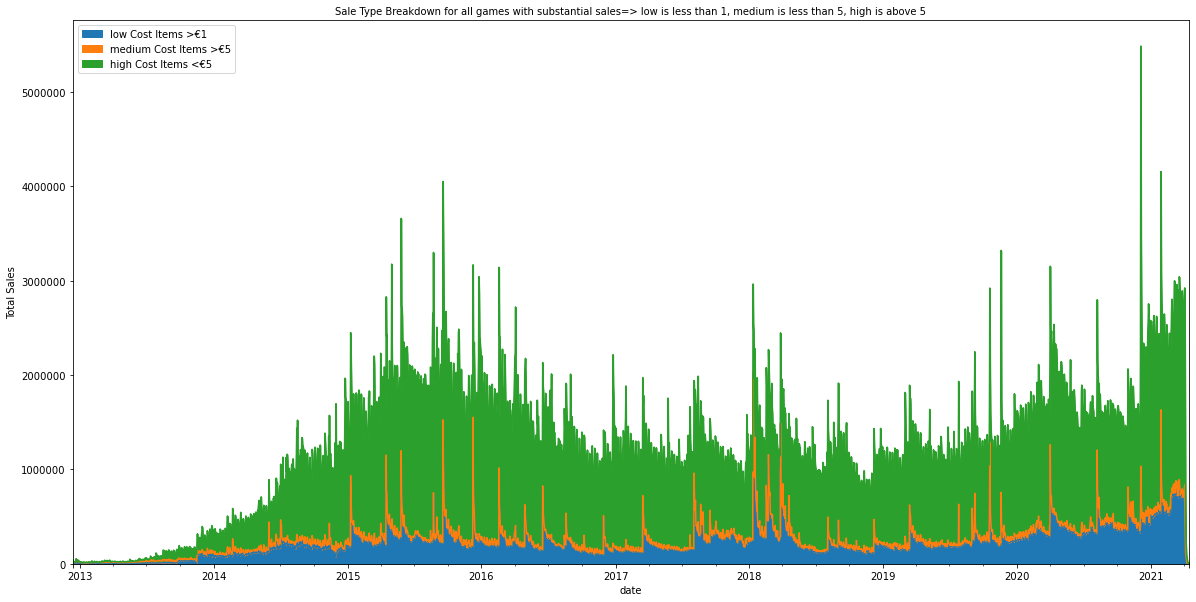

In [18]:
ax = dfj.plot.area(figsize=(20, 10))
plt.ticklabel_format(style='plain', axis='y')
ax.set_ylabel("Total Sales")
ax.set_title('Sale Type Breakdown for all games with substantial sales=> low is less than 1, medium is less than 5, high is above 5', fontsize=10)
plt.savefig("Graphs2/totals_graph.png")

In [19]:
data_perc = dfj.divide(dfj.sum(axis=1),axis=0)

In [20]:
data_perc

,low Cost Items >€1,medium Cost Items >€5,high Cost Items <€5
date,,,
2012-12-12,0.186872,0.570408,0.242720
2012-12-13,0.185191,0.570907,0.243902
2012-12-14,0.312317,0.512074,0.175609
2012-12-15,0.282735,0.572957,0.144309
2012-12-16,0.248732,0.588232,0.163037
...,...,...,...
2021-04-10,0.095473,0.000000,0.904527
2021-04-11,0.032065,0.000000,0.967935
2021-04-12,0.034685,0.000000,0.965315


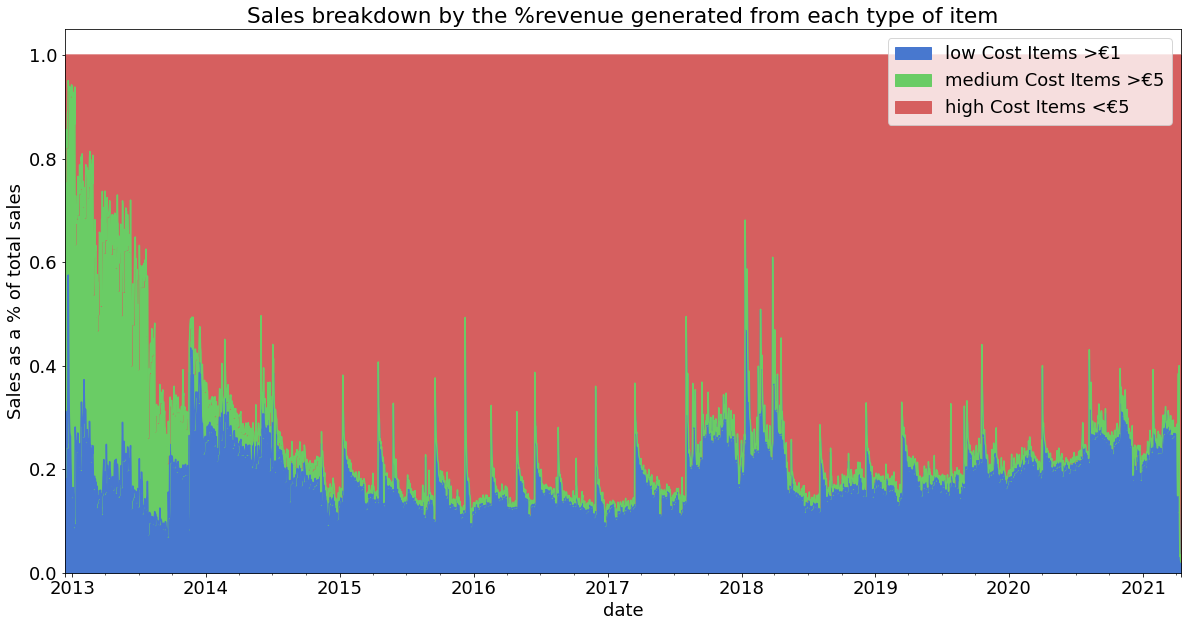

In [26]:
plt.rcParams.update({'font.size': 18})
ax2=data_perc.plot(kind="area",figsize=(20, 10))
ax2.set_ylabel("Sales as a % of total sales")
plt.style.use("seaborn-muted")
ax2.set_title('Sales breakdown by the %revenue generated from each type of item')
plt.legend(loc ="upper right",frameon=True)
plt.savefig("Graphs2/total_percent_graph.png")

In [22]:
print (plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
